<a href="https://colab.research.google.com/github/mvu2ab/EDA-TD/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

In [5]:
! git clone https://github.com/mvu2ab/EDA-TD

Cloning into 'EDA-TD'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 59 (delta 11), reused 10 (delta 10), pack-reused 43 (from 1)
Receiving objects: 100% (59/59), 4.93 MiB | 21.59 MiB/s, done.
Resolving deltas: 100% (18/18), done.


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/content/EDA-TD/assignment/data/airbnb_hw.csv')
df.shape
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [13]:
cross_tab = pd.crosstab(df['Room Type'], df['Property Type'])
print(cross_tab)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

What patterns do you see in what kinds of rentals are available? There are the most apartments for rent. The least number of lighthouses for rent.
For which kinds of properties are private rooms more common than renting the entire property? It is more common to rent a private room in a Bed and Breakfast, Dorm, or a House than the entire property.

In [24]:

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')



Statistical description of Price:
count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


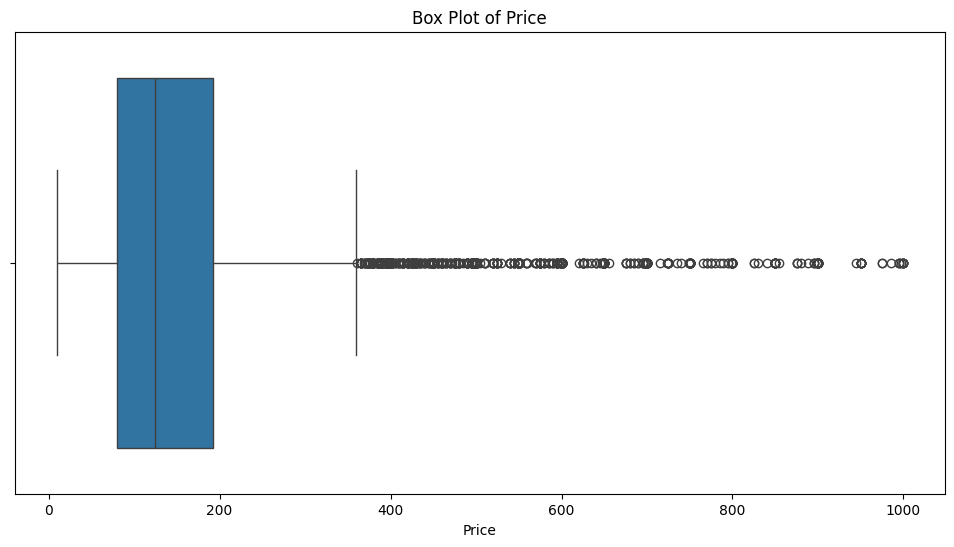

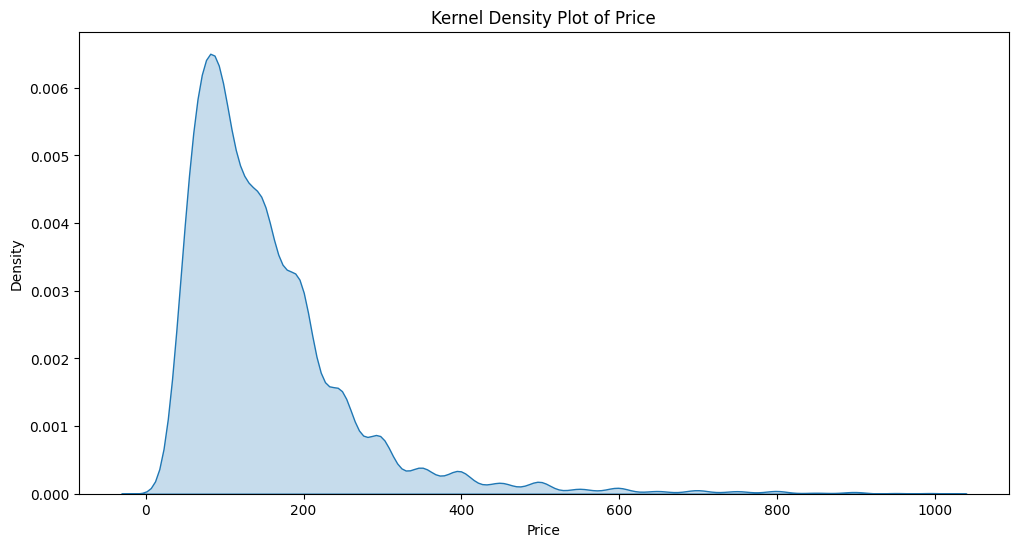

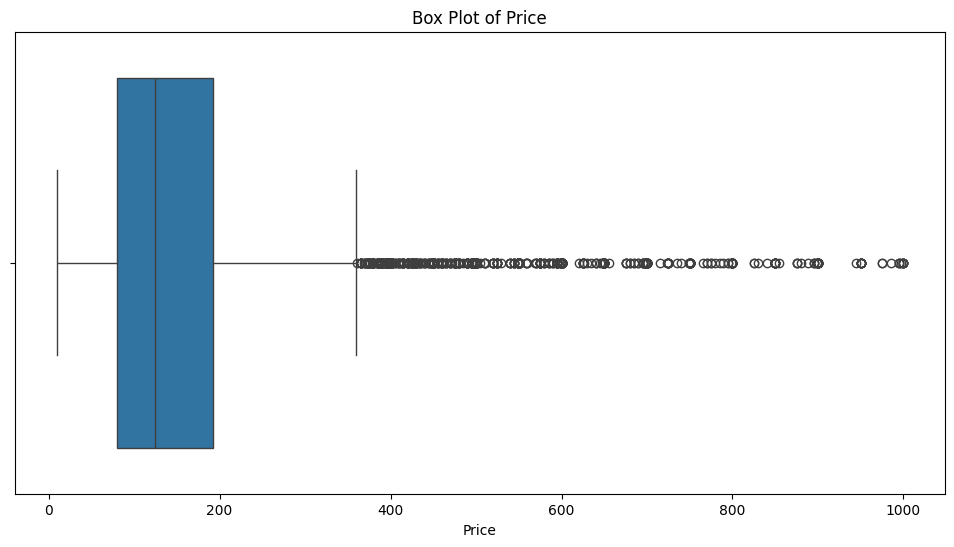

In [25]:
import seaborn as sns
print("Statistical description of Price:")
print(df['Price'].describe())

# Histogram
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

#Kernel Density Plot for 'Price'
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Price'], fill=True)
plt.title('Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Box Plot for 'Price' to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()



The scaling could definitely be improved due to the fact that a lot of the points are outside the box.

Statistical description of price_log:
count    30297.000000
mean         4.854625
std          0.591928
min          2.397895
25%          4.394449
50%          4.836282
75%          5.262690
max          6.907755
Name: price_log, dtype: float64


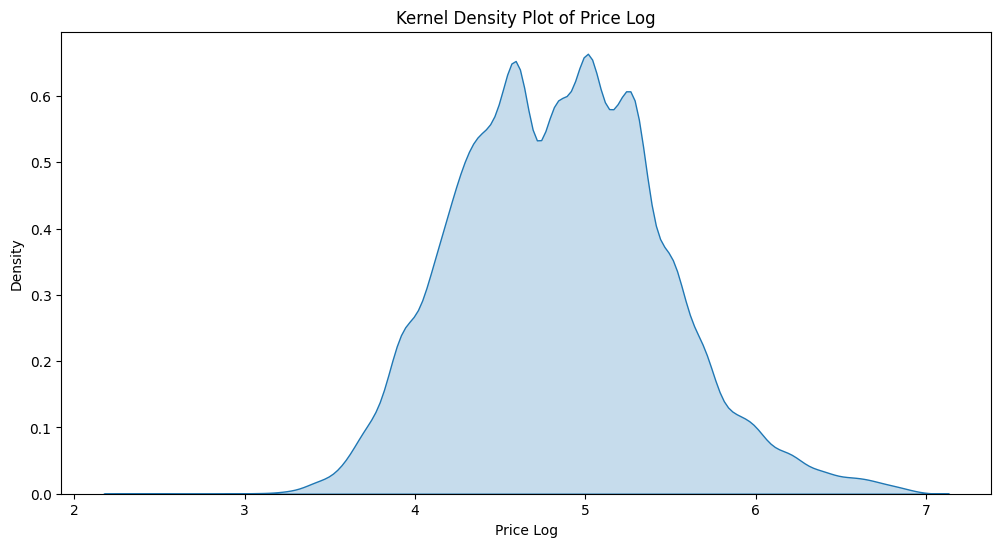

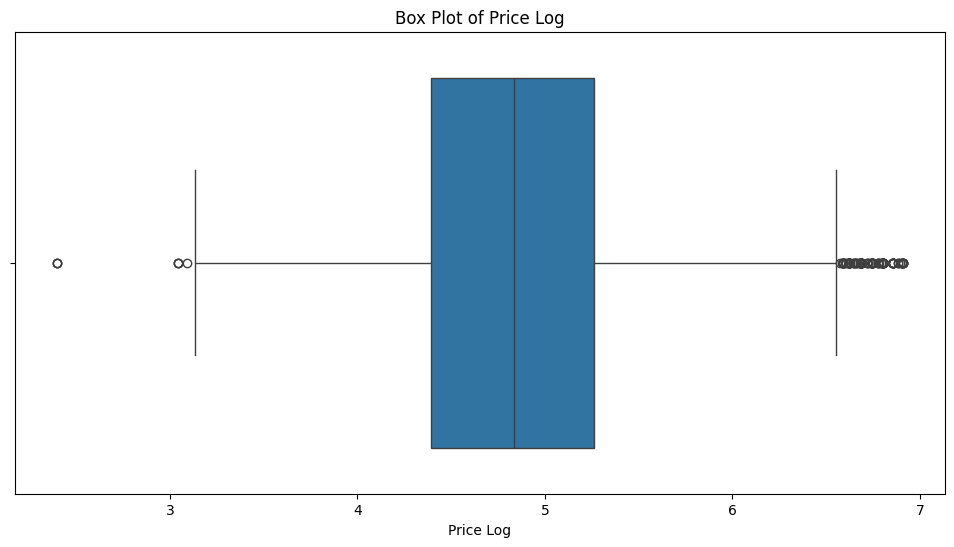

In [26]:
df['price_log'] = df['Price'].apply(lambda x: np.log(x + 1))

print("Statistical description of price_log:")
print(df['price_log'].describe())

plt.figure(figsize=(12, 6))
sns.kdeplot(df['price_log'], fill=True)
plt.title('Kernel Density Plot of Price Log')
plt.xlabel('Price Log')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price_log'])
plt.title('Box Plot of Price Log')
plt.xlabel('Price Log')
plt.show()


This scaling is significantly better.

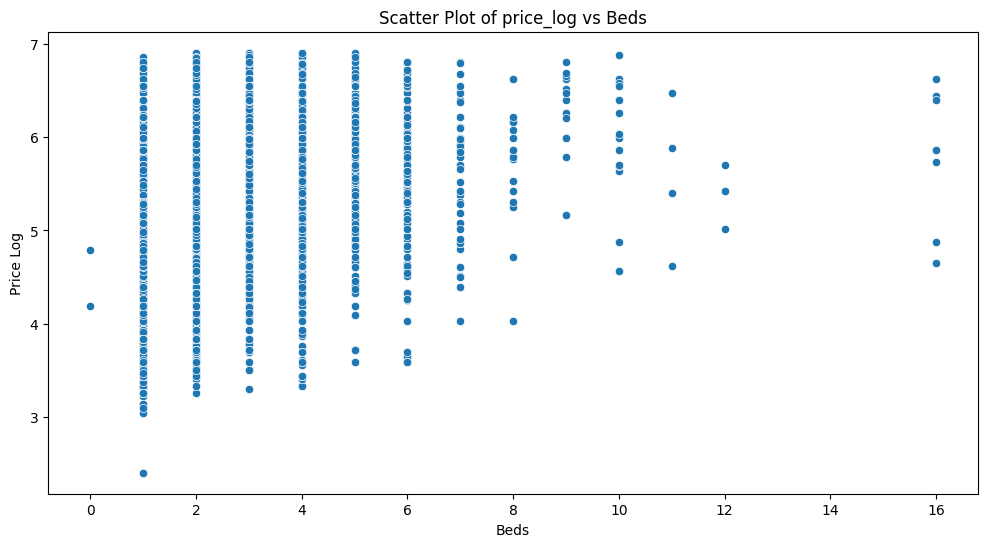

        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Beds'], y=df['price_log'])
plt.title('Scatter Plot of price_log vs Beds')
plt.xlabel('Beds')
plt.ylabel('Price Log')
plt.show()

price_by_beds = df.groupby('Beds')['Price'].describe()
print(price_by_beds)


The average price increases per bed, but dips between 11-12 beds. The standard deviation has less of a pattern for it increases until 7 beds, then decreases, then rises again.

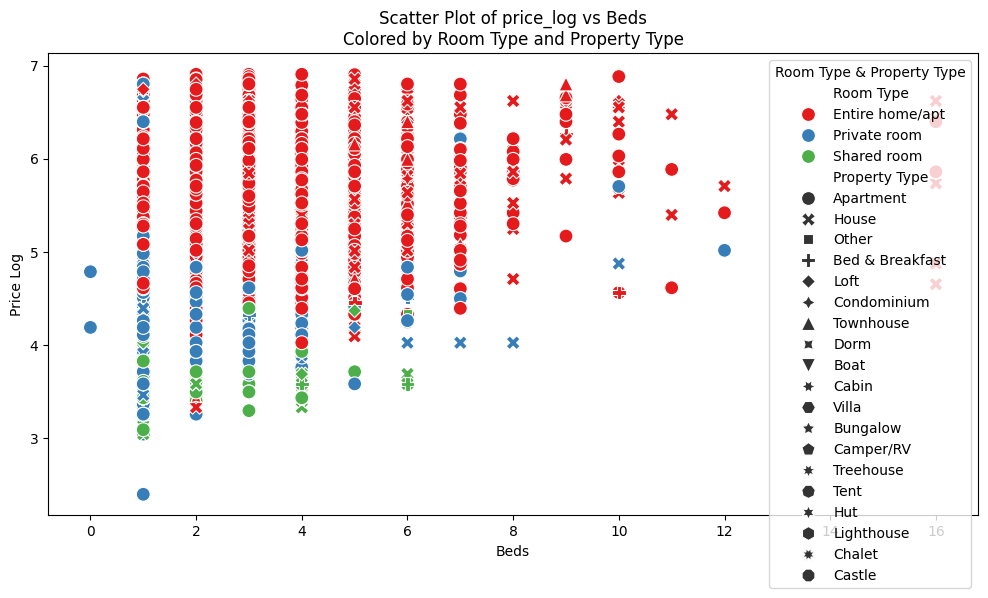

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Beds'], y=df['price_log'], hue=df['Room Type'], style=df['Property Type'], palette='Set1', s=100)
plt.title('Scatter Plot of price_log vs Beds\nColored by Room Type and Property Type')
plt.xlabel('Beds')
plt.ylabel('Price Log')
plt.legend(title='Room Type & Property Type')
plt.show()

In [30]:
price_by_room_and_property = df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(price_by_room_and_property)


                                   count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other    

Houses are the most expensive on average. Lofts are "other" properties have the highest std. The median seems to be the most reliant central tendency, becuase of the outliers present in all the categories.

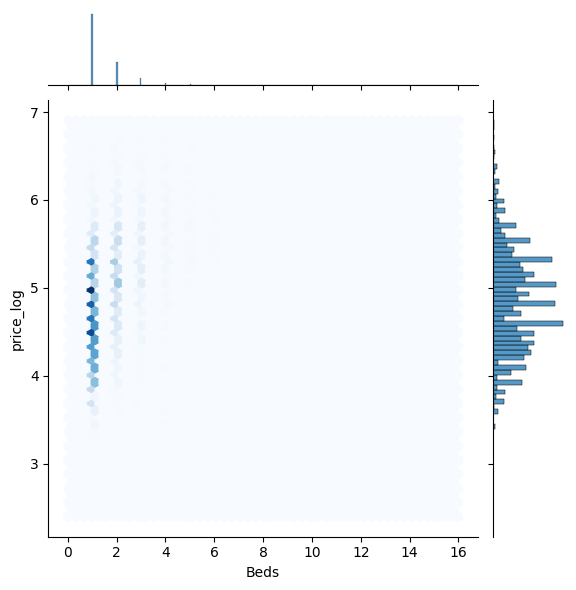

In [31]:
sns.jointplot(x='Beds', y='price_log', data=df, kind='hex', cmap='Blues')

plt.show()

A vast amount of the data lies between 4 and 5 on the Y axis and between 0 and 2 on the X axis. This shows that there are many outliers in the data.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [33]:
df2 = pd.read_csv('/content/EDA-TD/assignment/data/drilling_rigs.csv')

In [35]:
df2['time'] = pd.to_datetime(df2['Month'], format='mixed')

In [37]:
df2.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),time
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549,1973-01-01
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677,1973-02-01
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805,1973-03-01
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898,1973-04-01
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991,1973-05-01


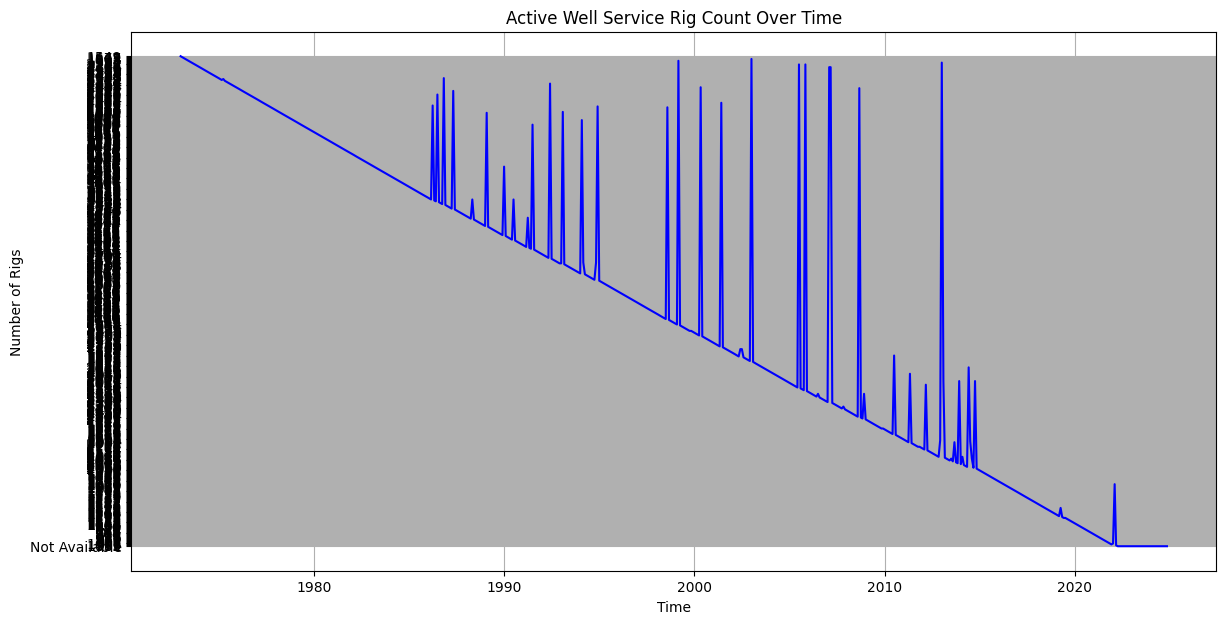

In [38]:
df2 = df2.sort_values(by='time')

plt.figure(figsize=(14, 7))
sns.lineplot(x='time', y='Active Well Service Rig Count (Number of Rigs)', data=df2, color='b')

plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.grid(True)

plt.show()


The number of rigs is trending downwards but spikes incredibly high during certain years.

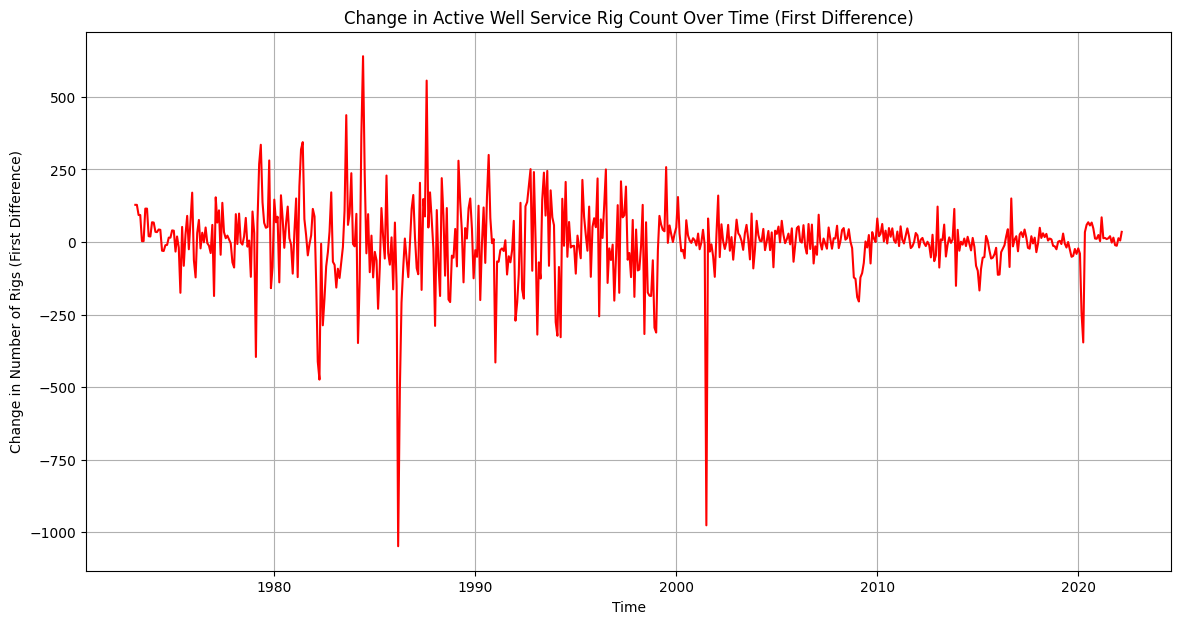

In [41]:
df2['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(df2['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')

df2['Active Well Service Rig Count (Number of Rigs)'] = df2['Active Well Service Rig Count (Number of Rigs)'].diff()

df2 = df2.sort_values(by='time')

plt.figure(figsize=(14, 7))
sns.lineplot(x='time', y='Active Well Service Rig Count (Number of Rigs)', data=df2, color='r')

plt.title('Change in Active Well Service Rig Count Over Time (First Difference)')
plt.xlabel('Time')
plt.ylabel('Change in Number of Rigs (First Difference)')
plt.grid(True)

plt.show()


There is fluctuation over time, however it is generally consistent.

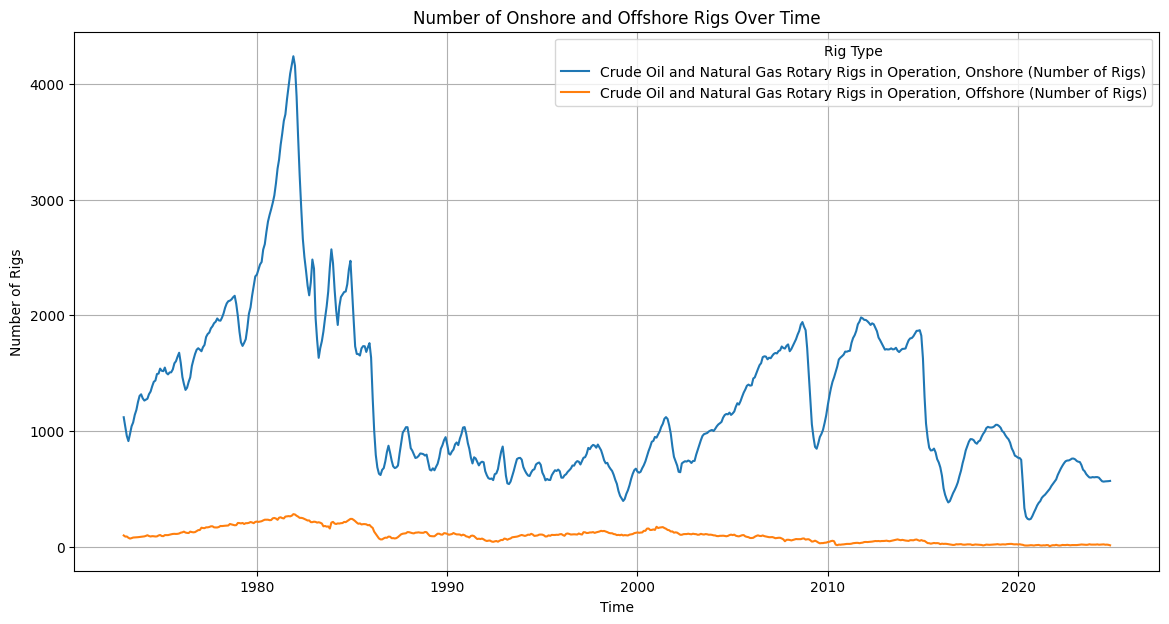

In [42]:

df_melted = pd.melt(df2, id_vars=['time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                    var_name='Rig Type', value_name='Rig Count')

df_melted = df_melted.sort_values(by='time')

plt.figure(figsize=(14, 7))
sns.lineplot(x='time', y='Rig Count', hue='Rig Type', data=df_melted)

plt.title('Number of Onshore and Offshore Rigs Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.grid(True)

plt.show()


There are always more onshore rigs.